<a href="https://colab.research.google.com/github/mahaairshad/MyFirstRepos/blob/Feature-2/FBCSP_unsimplified_with_mne_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install PyDrive

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id': '1-GmBB-nwfaKqDaymIjJfS5HZVxS97be8'})
download.GetContentFile('DOWNLOAD.rar')
download2 = drive.CreateFile({'id': '1uMebPOcHoeDgAFCCL3agmPnYA9PU9zRw'})
download2.GetContentFile('sample_neuromag.rar')

In [0]:
!pip install patool
import patoolib
patoolib.extract_archive("DOWNLOAD.rar")
patoolib.extract_archive("sample_neuromag.rar")

patool: Extracting DOWNLOAD.rar ...
patool: running /usr/bin/unrar x -- /content/DOWNLOAD.rar
patool:     with cwd='./Unpack_be9sc2_f'
patool: ... DOWNLOAD.rar extracted to `DOWNLOAD' (local file exists).
patool: Extracting sample_neuromag.rar ...
patool: running /usr/bin/unrar x -- /content/sample_neuromag.rar
patool:     with cwd='./Unpack_mb7o30nh'
patool: ... sample_neuromag.rar extracted to `data'.


'data'

In [0]:
!pip install mne --upgrade
import mne

Requirement already up-to-date: mne in /usr/local/lib/python3.6/dist-packages (0.19.2)


In [0]:
from scipy.io import loadmat
import numpy as np
import pandas as pd

In [0]:
annotsS1 = loadmat('Data_sample/ParsedMEGData_P1.mat')

In [0]:
annotsS1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'MEGdata'])

In [0]:
mdata1 = annotsS1['MEGdata']
mtype1 = mdata1.dtype
ndata1 = {n: mdata1[n][0,0] for n in mtype1.names}

In [0]:
mdata1 = annotsS1['MEGdata']
mtype1 = mdata1.dtype
ndata1 = {n: mdata1[n][0,0] for n in mtype1.names}

In [0]:
s_sess1=ndata1['s']
x_sess1=ndata1['x']
y_sess1=ndata1['y']
c_sess1=ndata1['c']
ci_sess1=ndata1['ci']
class_info_Sess1=ndata1['classInfo']

In [0]:
x_sess1.shape

(3500, 300, 200)

In [0]:
samp=x_sess1
samp=np.swapaxes(samp,0,1)
samp=np.swapaxes(samp,0,2)
samp=np.swapaxes(samp,1,2)
samp.shape

(200, 300, 3500)

In [0]:
z=samp[0,:,:]
for i in range (1,200):
    z=np.hstack([z,samp[i,:,:]])

In [0]:
samp=z
samp.shape

(300, 700000)

In [0]:
'''from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=[0,1])
scaler.fit(samp)
samp = scaler.transform(samp)
samp'''

'from sklearn.preprocessing import MinMaxScaler\nscaler=MinMaxScaler(feature_range=[0,1])\nscaler.fit(samp)\nsamp = scaler.transform(samp)\nsamp'

In [0]:
#Making an array with names of our channels in same format as exists for Neuromag
import re
chnl_names=c_sess1.reshape(300,)
chnl_names=str(chnl_names)
chnl_names=re.findall('\[\'.*?\'\]',chnl_names)
len(chnl_names)
channel=[]
for i in range (len(chnl_names)):
    k=str(chnl_names[i])[2:-2]
    channel.append(k)
for i in range (len(channel)):
    channel[i]=re.sub(r'(?<=[.G])(?=[^\s])', r' ', channel[i])
len(channel)

300

In [0]:
#Info for a sample Neuromag data is used in order to match layout and montage
traw= mne.io.read_raw_fif('data/mind004_050924_median01_raw.fif')

Opening raw data file data/mind004_050924_median01_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 49840 ... 1986479 =     27.799 ...  1107.979 secs
Ready.
Current compensation grade : 0


In [0]:
temp=traw.info['ch_names']
temp

['MEG 0113',
 'MEG 0112',
 'MEG 0111',
 'MEG 0122',
 'MEG 0123',
 'MEG 0121',
 'MEG 0132',
 'MEG 0133',
 'MEG 0131',
 'MEG 0143',
 'MEG 0142',
 'MEG 0141',
 'MEG 0213',
 'MEG 0212',
 'MEG 0211',
 'MEG 0222',
 'MEG 0223',
 'MEG 0221',
 'MEG 0232',
 'MEG 0233',
 'MEG 0231',
 'MEG 0243',
 'MEG 0242',
 'MEG 0241',
 'MEG 0313',
 'MEG 0312',
 'MEG 0311',
 'MEG 0322',
 'MEG 0323',
 'MEG 0321',
 'MEG 0333',
 'MEG 0332',
 'MEG 0331',
 'MEG 0343',
 'MEG 0342',
 'MEG 0341',
 'MEG 0413',
 'MEG 0412',
 'MEG 0411',
 'MEG 0422',
 'MEG 0423',
 'MEG 0421',
 'MEG 0432',
 'MEG 0433',
 'MEG 0431',
 'MEG 0443',
 'MEG 0442',
 'MEG 0441',
 'MEG 0513',
 'MEG 0512',
 'MEG 0511',
 'MEG 0523',
 'MEG 0522',
 'MEG 0521',
 'MEG 0532',
 'MEG 0533',
 'MEG 0531',
 'MEG 0542',
 'MEG 0543',
 'MEG 0541',
 'MEG 0613',
 'MEG 0612',
 'MEG 0611',
 'MEG 0622',
 'MEG 0623',
 'MEG 0621',
 'MEG 0633',
 'MEG 0632',
 'MEG 0631',
 'MEG 0642',
 'MEG 0643',
 'MEG 0641',
 'MEG 0713',
 'MEG 0712',
 'MEG 0711',
 'MEG 0723',
 'MEG 0722',

In [0]:
bch=['MEG 1633',
 'MEG 1632',
 'MEG 1631',
 'MEG 1643',
 'MEG 1642',
 'MEG 1641',
 'MEG 1713',
 'MEG 1712',
 'MEG 1711',
 'MEG 1723',
 'MEG 1722',
 'MEG 1721',
 'MEG 1733',
 'MEG 1732',
 'MEG 1731',
 'MEG 1743',
 'MEG 1742',
 'MEG 1741',
 'MEG 1833',
 'MEG 1832',
 'MEG 1831',
 'MEG 1843',
 'MEG 1842',
 'MEG 1841',
 'MEG 1913',
 'MEG 1912',
 'MEG 1911',
 'MEG 1923',
 'MEG 1922',
 'MEG 1921',
 'MEG 1933',
 'MEG 1932',
 'MEG 1931',
 'MEG 1943',
 'MEG 1942',
 'MEG 1941',
 'MEG 2013',
 'MEG 2012',
 'MEG 2011',
 'MEG 2023',
 'MEG 2022',
 'MEG 2021',
 'MEG 2033',
 'MEG 2032',
 'MEG 2031',
 'MEG 2043',
 'MEG 2042',
 'MEG 2041',
 'MEG 2113',
 'MEG 2112',
 'MEG 2111',
 'MEG 2123',
 'MEG 2122',
 'MEG 2121',
 'MEG 2133',
 'MEG 2132',
 'MEG 2131',
 'MEG 2143',
 'MEG 2142',
 'MEG 2141',
 'MEG 2233',
 'MEG 2232',
 'MEG 2231',
 'MEG 2243',
 'MEG 2242',
 'MEG 2241',
 'MEG 2313',
 'MEG 2312',
 'MEG 2311',
 'MEG 2323',
 'MEG 2322',
 'MEG 2321',
 'MEG 2333',
 'MEG 2332',
 'MEG 2331',
 'MEG 2343',
 'MEG 2342',
 'MEG 2341',
 'MEG 2433',
 'MEG 2432',
 'MEG 2431',
 'MEG 2443',
 'MEG 2442',
 'MEG 2441',
 'MEG 2513',
 'MEG 2512',
 'MEG 2511',
 'MEG 2523',
 'MEG 2522',
 'MEG 2521',
 'MEG 2533',
 'MEG 2532',
 'MEG 2531',
 'MEG 2543',
 'MEG 2542',
 'MEG 2541',
 'MEG 2633',
 'MEG 2632',
 'MEG 2631',
 'MEG 1533',
 'MEG 1532',
 'MEG 1531',
 ]
len(bch)

102

In [0]:
#Our data is arranged in the same order as standard Neuromag
new_samp=np.zeros((318,700000))
new_ch= [0] * 318
bad_ch=[]
good_ch=[]
for i in range (len(temp)):
  for k in range (len(channel)):
    if (channel[k]==temp[i]) and (channel[k] not in bch):
      j=k
      break
    else:
      j=None
  if j!=None:
    new_samp[i,:]=samp[j,:]
    new_ch[i]=temp[i]
    good_ch.append(temp[i])
  else:
    new_ch[i]=temp[i]
    bad_ch.append(temp[i])
  j=None

In [0]:
len(good_ch)

203

In [0]:
new_samp.shape

(318, 700000)

In [0]:
len(new_ch)

318

In [0]:
#Channels not utilized in our data will be excluded
len(bad_ch)

115

In [0]:
'''for i in range (len(temp)):
  print(new_ch[i]," ",temp[i],"\n")'''

'for i in range (len(temp)):\n  print(new_ch[i]," ",temp[i],"\n")'

In [0]:
traw.info

<Info | 25 non-empty fields
    acq_pars : str | 13878 items
    bads : list | 0 items
    ch_names : list | MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, ...
    chs : list | 318 items (GRAD: 204, MAG: 102, STIM: 9, EOG: 2, ECG: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    description : str | 70 items
    dev_head_t : Transform | 3 items
    dig : Digitization | 130 items (3 Cardinal, 4 HPI, 123 Extra)
    events : list | 1 items
    experimenter : str | 3 items
    file_id : dict | 4 items
    highpass : float | 0.10000000149011612 Hz
    hpi_meas : list | 1 items
    hpi_results : list | 1 items
    lowpass : float | 418.34002685546875 Hz
    meas_date : tuple | 2005-09-24 23:46:01 GMT
    meas_id : dict | 4 items
    nchan : int | 318
    proc_history : list | 0 items
    proj_id : ndarray | 1 items
    proj_name : str | 7 items
    projs : list | PCA-v1: off, PCA-v2: off, PCA-v3: off
    sfreq : float | 1792.8858642578125 Hz
    subject_info : dict |

The Neuromag system used consists of 306 MEG sensors (204 gradiometers and 102 magnetometers)

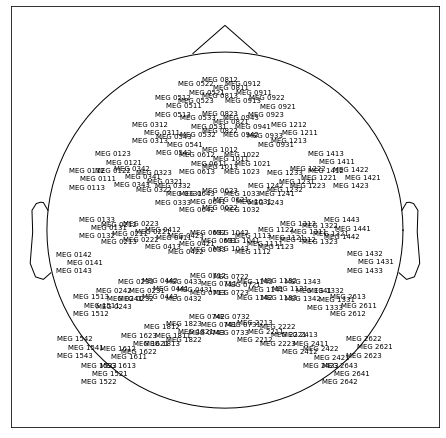

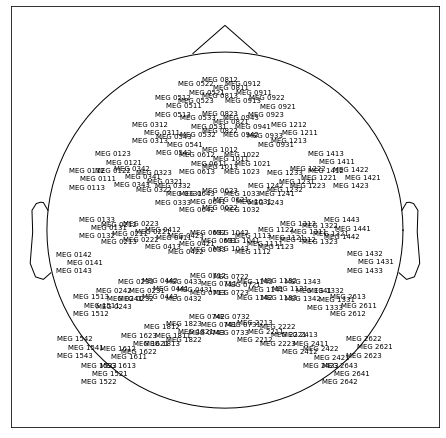

In [0]:
%matplotlib inline
lyt=mne.channels.find_layout(traw.info, exclude=bad_ch)
from mne import viz
mne.viz.plot_layout(layout=lyt, picks=None, show=True)

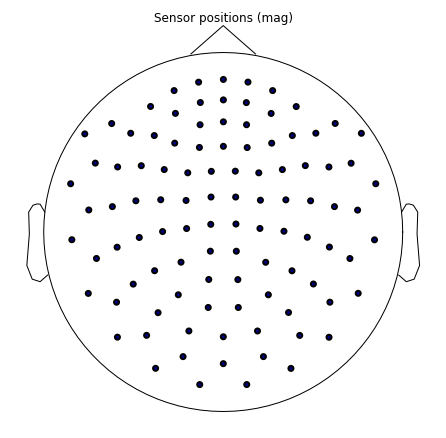

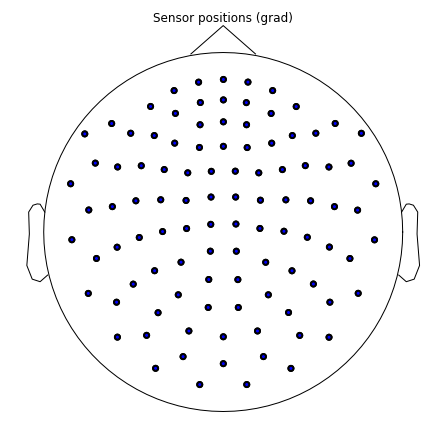

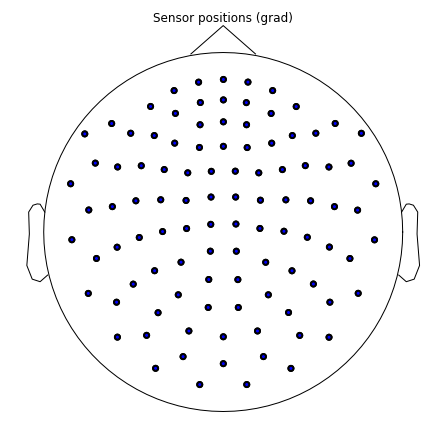

In [0]:
traw.plot_sensors(ch_type='mag')
traw.plot_sensors(ch_type='grad')

In [0]:
%matplotlib inline

In [0]:
traw= mne.io.read_raw_fif('data/mind004_050924_median01_raw.fif')
traw.info['sfreq']=500
data = new_samp.copy()
ch_names = new_ch.copy()

Opening raw data file data/mind004_050924_median01_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 49840 ... 1986479 =     27.799 ...  1107.979 secs
Ready.
Current compensation grade : 0


Opening raw data file data/mind004_050924_median01_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 49840 ... 1986479 =     27.799 ...  1107.979 secs
Ready.
Current compensation grade : 0
Creating RawArray with float64 data, n_channels=318, n_times=700000
Current compensation grade : 0
    Range : 0 ... 699999 =      0.000 ...  1399.998 secs
Ready.


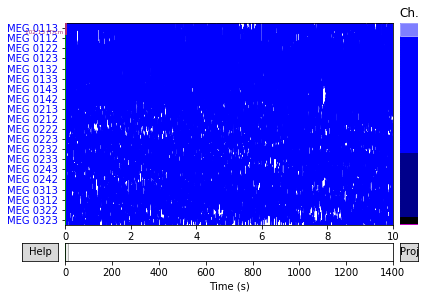

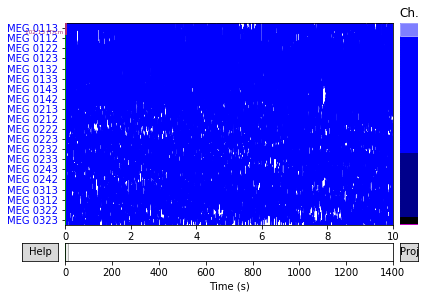

In [0]:
traw= mne.io.read_raw_fif('data/mind004_050924_median01_raw.fif')
traw.info['sfreq']=500
data = new_samp.copy()
ch_names = new_ch.copy()
raw = mne.io.RawArray(data, traw.info)
scalings = 'auto'  # Could also pass a dictionary with some value == 'auto'
raw.plot(n_channels=20, scalings=scalings, title='Auto-scaled Data from arrays',
         show=True, block=True)

Opening raw data file data/mind004_050924_median01_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 49840 ... 1986479 =     27.799 ...  1107.979 secs
Ready.
Current compensation grade : 0
Creating RawArray with float64 data, n_channels=318, n_times=700000
Current compensation grade : 0
    Range : 0 ... 699999 =      0.000 ...  1399.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651

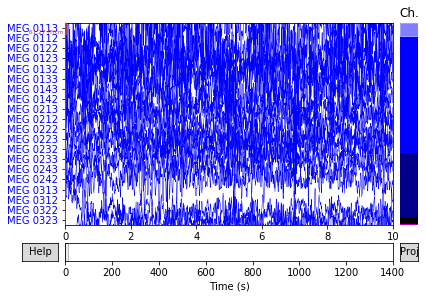

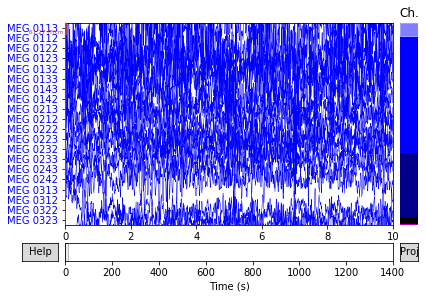

In [0]:
traw= mne.io.read_raw_fif('data/mind004_050924_median01_raw.fif')
traw.info['sfreq']=500
data = new_samp.copy()
ch_names = new_ch.copy()
raw = mne.io.RawArray(data, traw.info)
raw.filter(1., 40., fir_design='firwin')
scalings = 'auto'  # Could also pass a dictionary with some value == 'auto'
raw.plot(n_channels=20, scalings=scalings, title='Auto-scaled Data from arrays',
         show=True, block=True)

Opening raw data file data/mind004_050924_median01_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 49840 ... 1986479 =     27.799 ...  1107.979 secs
Ready.
Current compensation grade : 0
Creating RawArray with float64 data, n_channels=318, n_times=700000
Current compensation grade : 0
    Range : 0 ... 699999 =      0.000 ...  1399.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 s

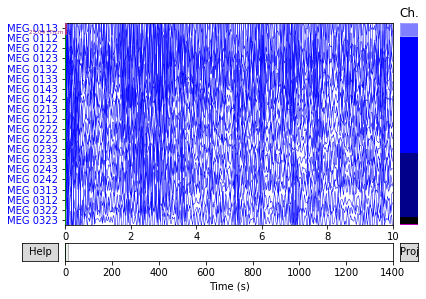

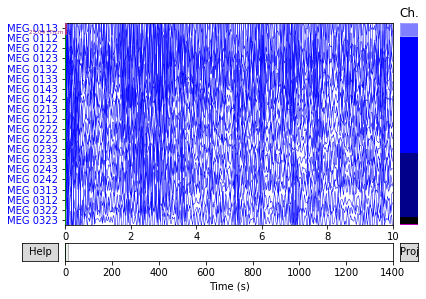

In [0]:
traw= mne.io.read_raw_fif('data/mind004_050924_median01_raw.fif')
traw.info['sfreq']=500
data = new_samp.copy()
ch_names = new_ch.copy()
raw = mne.io.RawArray(data, traw.info)
raw.filter(8., 13., fir_design='firwin')
scalings = 'auto'  # Could also pass a dictionary with some value == 'auto'
raw.plot(n_channels=20, scalings=scalings, title='Auto-scaled Data from arrays',
         show=True, block=True)

Opening raw data file data/mind004_050924_median01_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 49840 ... 1986479 =     27.799 ...  1107.979 secs
Ready.
Current compensation grade : 0
Creating RawArray with float64 data, n_channels=318, n_times=700000
Current compensation grade : 0
    Range : 0 ... 699999 =      0.000 ...  1399.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 14 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 14.00
- Lower transition bandwidth: 3.50 Hz (-6 dB cutoff frequency: 12.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 47

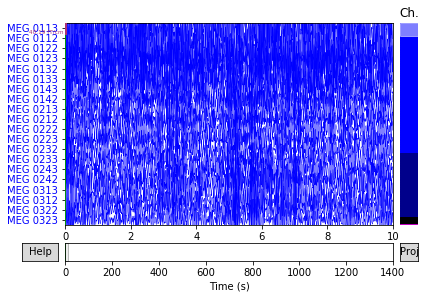

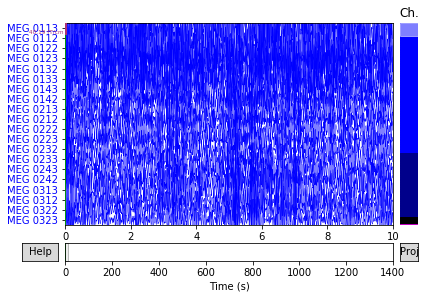

In [0]:
traw= mne.io.read_raw_fif('data/mind004_050924_median01_raw.fif')
traw.info['sfreq']=500
data = new_samp.copy()
ch_names = new_ch.copy()
raw = mne.io.RawArray(data, traw.info)
raw.filter(14., 30., fir_design='firwin')
scalings = 'auto'  # Could also pass a dictionary with some value == 'auto'
raw.plot(n_channels=20, scalings=scalings, title='Auto-scaled Data from arrays',
         show=True, block=True)

In [0]:
picks = mne.pick_channels(ch_names=good_ch, include=good_ch)

Opening raw data file data/mind004_050924_median01_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 49840 ... 1986479 =     27.799 ...  1107.979 secs
Ready.
Current compensation grade : 0
Creating RawArray with float64 data, n_channels=318, n_times=700000
Current compensation grade : 0
    Range : 0 ... 699999 =      0.000 ...  1399.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651

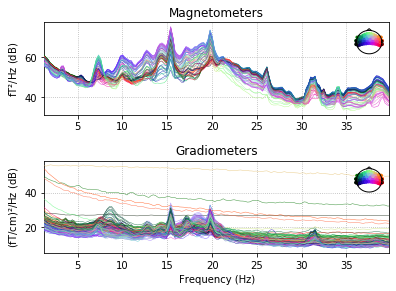

In [0]:
%matplotlib inline
traw= mne.io.read_raw_fif('data/mind004_050924_median01_raw.fif')
traw.info['sfreq']=500
data = new_samp.copy()
ch_names = new_ch.copy()
raw = mne.io.RawArray(data, traw.info)
raw.filter(1., 40., fir_design='firwin')
fig=raw.plot_psd(fmin=1., fmax=40., tmax=1400., average=False, picks=good_ch, spatial_colors=True);
fig.savefig('faa.png') 

In [0]:
e1=y_sess1.copy()
e1=np.delete(e1,199)
e1=e1.reshape(199,)
t=np.array([y_sess1[0,0]])
e1=np.concatenate((t,e1), axis=0)
e1=e1.reshape(200,1)

In [0]:
e2=y_sess1.copy()
e2=e2.reshape(200,1)

In [0]:
intervals=np.arange(0,700000,3500)
intervals=intervals.reshape(200,1)

In [0]:
events=np.hstack([intervals,e1,e2])

In [0]:
event_id = {"Hands": 1, "Feet": 2, "Word Generation": 3 , "Subtraction": 4}

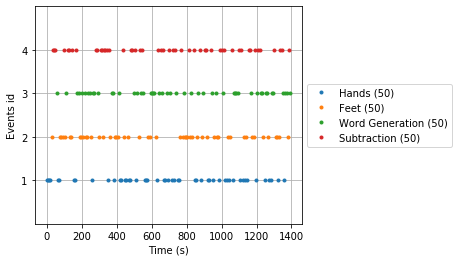

In [0]:
import matplotlib.pyplot
fig=mne.viz.plot_events(events, raw.info['sfreq'], raw.first_samp, event_id=event_id);
fig.savefig('fee.png') 

In [0]:
tmin, tmax = 2.5, 6  # start and end of an epoch in sec.

# Set up indices of channels to include in analysis
picks = mne.pick_types(raw.info, meg=True, stim=False, eog=False,
                       ref_meg=False, exclude=bad_ch)

# Read epochs
decim = 2  # decimate to make the example faster to run
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True,
                    picks=picks, baseline=None, preload=True,decim=decim)

print(epochs)

200 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 3)
3 projection items activated
Loading data for 200 events and 1751 original time points ...


<ipython-input-50-7b8586c636e2>:10: RuntimeWarning: Projection vector "PCA-v1" has magnitude 0.57 (should be unity), applying projector with 68/102 of the original channels available may be dangerous, consider recomputing and adding projection vectors for channels that are eventually used. If this is intentional, consider using info.normalize_proj()
  picks=picks, baseline=None, preload=True,decim=decim)
<ipython-input-50-7b8586c636e2>:10: RuntimeWarning: Projection vector "PCA-v2" has magnitude 0.92 (should be unity), applying projector with 68/102 of the original channels available may be dangerous, consider recomputing and adding projection vectors for channels that are eventually used. If this is intentional, consider using info.normalize_proj()
  picks=picks, baseline=None, preload=True,decim=decim)
<ipython-input-50-7b8586c636e2>:10: RuntimeWarning: Projection vector "PCA-v3" has magnitude 0.89 (should be unity), applying projector with 68/102 of the original channels available m

0 bad epochs dropped
<Epochs  |   200 events (all good), 2.5 - 6 sec, baseline off, ~280.2 MB, data loaded,
 'Feet': 50
 'Hands': 50
 'Subtraction': 50
 'Word Generation': 50>


In [0]:
Data = epochs.get_data()
print(type(Data))
print(Data.shape)  # n_epochs, n_channels, n_times #n_times=1751/2decim

<class 'numpy.ndarray'>
(200, 203, 876)


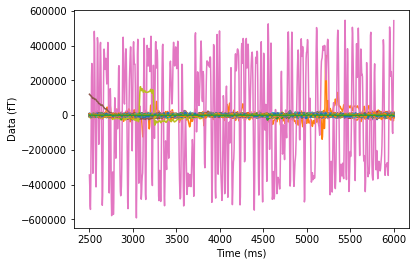

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(1e3 * epochs.times, 1e15 * Data[0, :, :].T)
plt.xlabel('Time (ms)')
plt.ylabel('Data (fT)');

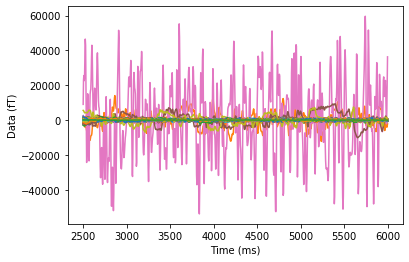

In [0]:
data_mean = np.mean(Data, axis=0)

plt.plot(1e3 * epochs.times, 1e15 * data_mean[:, :].T)
plt.xlabel('Time (ms)')
plt.ylabel('Data (fT)');

In [0]:
#The channel with max. peaks/activity
max_t = evoked.get_peak(ch_type='mag',tmin=3.5, tmax=6)[1] #[0] returns the name of channel with max activity, [1] returns the time in which it takes place
evoked.get_peak(ch_type='mag',tmin=3.5, tmax=6)[0]

'MEG 1121'